# Preprocessing Recognition Data and Analysis

In [7]:
#We load the libraries that needed
import pandas as pd
from video_characteristics import *
import boto3
import botocore
import json
import sys
import os
import time
import numpy as np
import random
import pprint
import math
from IPython.display import Video
import matplotlib.pyplot as plt
from loading_s3_data import *

In [8]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams['agg.path.chunksize'] = 0
mpl.rcParams.update( mpl.rc_params() )
plt.rcParams.update({'font.size': 11})
#plt.rcParams.update({'text.usetex': True})
plt.rcParams.update({'text.latex.preamble': 'bold'})
plt.rc('font', family='serif')

In [9]:
df = pd.read_csv('../data/dataset_2.csv')
df.head()

,video_key,child_id,ASD,age,gender,VideoDuration,VideoFrameRate,VideoFrameHeight,VideoFrameWidth,Confidence1,...,EyesClosedConf,EyeGlasses,EyeGlassesConf,SunGlasses,SunGlassesConf,AgeLow,AgeHigh,Gender,GenderConf,Size
0,%2B07758486393/1637011476385/GuessWhat.mp4,+07758486393__daisy,1,0.0,Female,57.4,29.9,720.0,960.0,99.5,...,95.0,False,89.6,False,94.2,24.3,32.5,Female,95.8,0.264408
1,%2B07766544436/1626976603665/GuessWhat.mp4,+07766544436__andrew,1,11.0,Male,57.1,30.0,720.0,960.0,99.5,...,86.2,False,97.1,False,100.0,10.6,18.3,Female,98.5,0.030907
2,%2B07766544436/1626976728265/GuessWhat.mp4,+07766544436__andrew,1,11.0,Male,57.4,30.0,720.0,960.0,97.3,...,84.4,False,96.1,False,100.0,11.7,19.7,Female,91.3,0.022504
3,%2B11991436014/1567730951746/GuessWhat.mp4,+11991436014__Bernardo,1,3.0,Male,87.6,30.0,720.0,960.0,96.8,...,91.3,False,91.7,False,100.0,6.1,13.4,Female,93.6,0.406533
4,%2B13012528047/1587239689132/GuessWhat.mp4,+13012528047__dylan,1,8.0,Male,57.4,29.8,600.0,800.0,97.5,...,87.0,False,94.8,False,100.0,14.5,21.9,Male,93.9,0.031913


In [10]:
print(len(df))
print(df.columns)

2507
Index(['video_key', 'child_id', 'ASD', 'age', 'gender', 'VideoDuration',
       'VideoFrameRate', 'VideoFrameHeight', 'VideoFrameWidth', 'Confidence1',
       'Confidence2', 'Sharpness', 'Brightness', 'NoFace1', 'NoFace2',
       'MultiFace1', 'MultiFace2', 'Pitch1', 'Pitch2', 'Roll1', 'Roll2',
       'Yaw1', 'Yaw2', 'EyesClosed', 'EyesClosedConf', 'EyeGlasses',
       'EyeGlassesConf', 'SunGlasses', 'SunGlassesConf', 'AgeLow', 'AgeHigh',
       'Gender', 'GenderConf', 'Size'],
      dtype='object')


There is a total of 2507 videos in the dataset. We can see that the dataset contains the following columns:
`'video_key', 'child_id', 'ASD', 'age', 'gender', 'VideoDuration',
       'VideoFrameRate', 'VideoFrameHeight', 'VideoFrameWidth', 'Confidence1',
       'Confidence2', 'Sharpness', 'Brightness', 'NoFace1', 'NoFace2',
       'MultiFace1', 'MultiFace2', 'Pitch1', 'Pitch2', 'Roll1', 'Roll2',
       'Yaw1', 'Yaw2', 'EyesClosed', 'EyesClosedConf', 'EyeGlasses',
       'EyeGlassesConf', 'SunGlasses', 'SunGlassesConf', 'AgeLow', 'AgeHigh',
       'Gender', 'GenderConf', 'Size'`

In [11]:
#We want to know the number of children in the dataset
print("Number of children in the dataset: ", len(df["child_id"].unique()))

#How many have ASD?
print("Number of children with ASD: ", len(df[df["ASD"] == 1]["child_id"].unique()))
#How many have ASD?
print("Number of children without ASD: ", len(df[df["ASD"] == 0]["child_id"].unique()))

Number of children in the dataset:  329
Number of children with ASD:  274
Number of children without ASD:  55


There is a total of 329 children in the dataset : 
- 274 ASD 
- 55 ASD

## I. Analysis steps 

### A. Distribution of labels.

#### ASD vs NT

1    2359
0     148
Name: ASD, dtype: int64


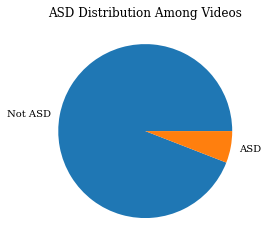

In [12]:
# Count the values in the 'ASD' column
counts = df['ASD'].value_counts()
print(counts)
# create a pie chart
plt.pie(counts, labels=['Not ASD', 'ASD'])

# add a title
plt.title('ASD Distribution Among Videos')

# show the chart
plt.show()

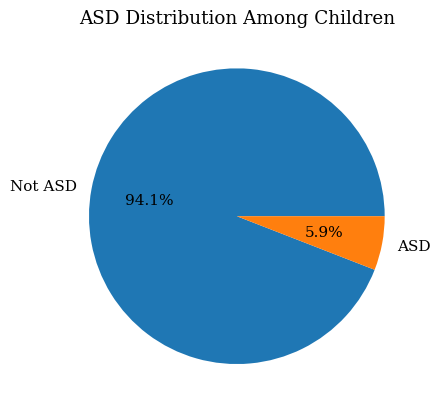

In [28]:
# Count the values in the 'ASD' column per child
counts = df.groupby('child_id')['ASD'].value_counts()
# Extract the counts for each child
not_asd_counts = counts.loc[:, 0]
asd_counts = counts.loc[:, 1]
print(not_asd_counts)
print(asd_counts)
# Create a pie chart for the column 'ASD' per child
plt.pie([asd_counts.sum(), not_asd_counts.sum()], labels=['Not ASD', 'ASD'], autopct='%1.1f%%')

# Add a title
plt.title('ASD Distribution Among Children')

# Show the chart
plt.show()

#### Age

Text(0, 0.5, 'Count')

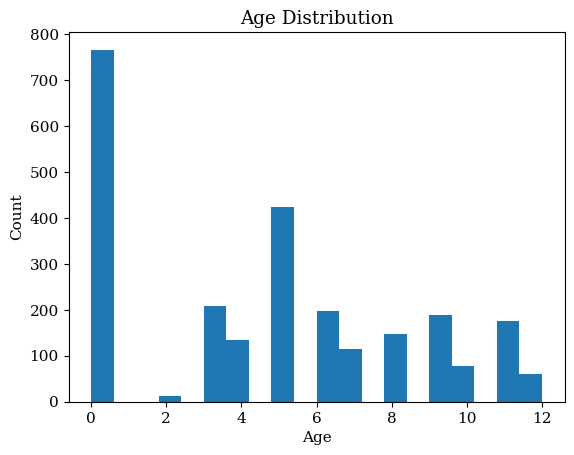

In [10]:
plt.hist(df['age'], bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

### Gender 

Male      1827
Female     624
None        54
Other        2
Name: gender, dtype: int64


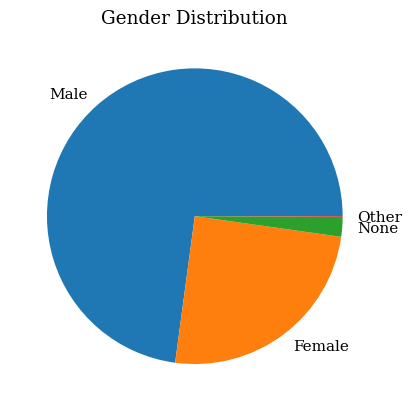

In [30]:
#Count the values in the 'gender' column per video
counts = df['gender'].value_counts()

print(counts)
# create a pie chart
plt.pie(counts, labels=['Male', 'Female', "None", "Other"])

# add a title
plt.title('Gender Distribution')

# show the chart
plt.show()

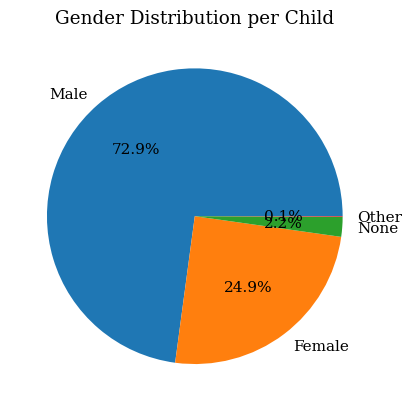

In [42]:
# Count the values in the 'gender' column per child
counts = df.groupby('child_id')['gender'].value_counts()

# Extract the counts for each child
male_counts = counts.loc[:, 'Male']
female_counts = counts.loc[:, 'Female']
none_counts = counts.loc[:, 'None']
other_counts = counts.loc[:, 'Other']

# Create a pie chart for the gender of each child
plt.pie([male_counts.sum(), female_counts.sum(), none_counts.sum(), other_counts.sum()],
        labels=['Male', 'Female', 'None', 'Other'], autopct='%1.1f%%')

# Add a title
plt.title('Gender Distribution per Child')

# Show the chart
plt.show()

### Videoduration

Text(0, 0.5, 'Count')

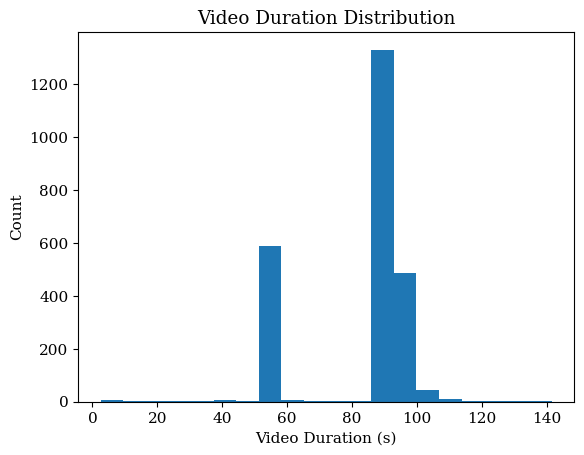

In [44]:
plt.hist(df['VideoDuration'], bins=20)
plt.title('Video Duration Distribution')
plt.xlabel('Video Duration (s)')
plt.ylabel('Count')